## **Import statments**


In [85]:
pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.76.0
    Uninstalling openai-1.76.0:
      Successfully uninstalled openai-1.76.0


In [1]:
# Importing necessary libraries for data preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from openai import OpenAI
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score
)
from scipy.stats import entropy

In [2]:
# Load the Data
DED_data = pd.read_csv('/content/Dry_Eye_Dataset.csv')

Dry Eye Disease
Y    13037
N     6963
Name: count, dtype: int64


<ipython-input-3-7827fedb8571>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DED_data, x='Dry Eye Disease', palette='pastel')


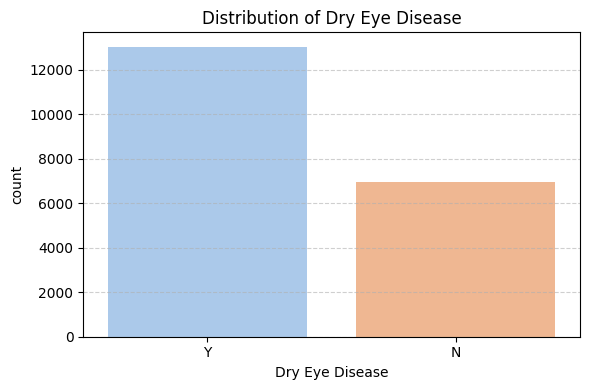

In [3]:
# Count the occurrences of each class in the target variable
class_counts = DED_data['Dry Eye Disease'].value_counts()

# Print the class distribution
print(class_counts)

#class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=DED_data, x='Dry Eye Disease', palette='pastel')
plt.title('Distribution of Dry Eye Disease')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **EDA**

In [4]:
# Display the first few rows of the dataset to understand its structure
pd.set_option('display.max_columns', None)
DED_data.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,99,N,Y,N,N,N,N,Y,N,N,3.5,N,Y,Y,N,Y


In [5]:
# Show the shape (number of rows and columns)
DED_data.shape

(20000, 26)

In [6]:
# Show the number of examples in each class
print(DED_data['Dry Eye Disease'].value_counts())

Dry Eye Disease
Y    13037
N     6963
Name: count, dtype: int64


In [7]:
# Check data types and null values
DED_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [8]:
# Summary statistics of numerical columns
summary_statistics = DED_data.describe()
summary_statistics

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [9]:
# Data types of each column
DED_data.dtypes

,0
Gender,object
Age,int64
Sleep duration,float64
Sleep quality,int64
Stress level,int64
Blood pressure,object
Heart rate,int64
Daily steps,int64
Physical activity,int64
Height,int64


In [10]:
# Check for Missing values / Null values in the dataset

missing_values = DED_data.isnull().sum()
missing_values

,0
Gender,0
Age,0
Sleep duration,0
Sleep quality,0
Stress level,0
Blood pressure,0
Heart rate,0
Daily steps,0
Physical activity,0
Height,0


In [11]:
# Check for duplicate rows in the dataset
duplicate_rows = DED_data.duplicated()
num_duplicates = duplicate_rows.sum()
num_duplicates

np.int64(0)

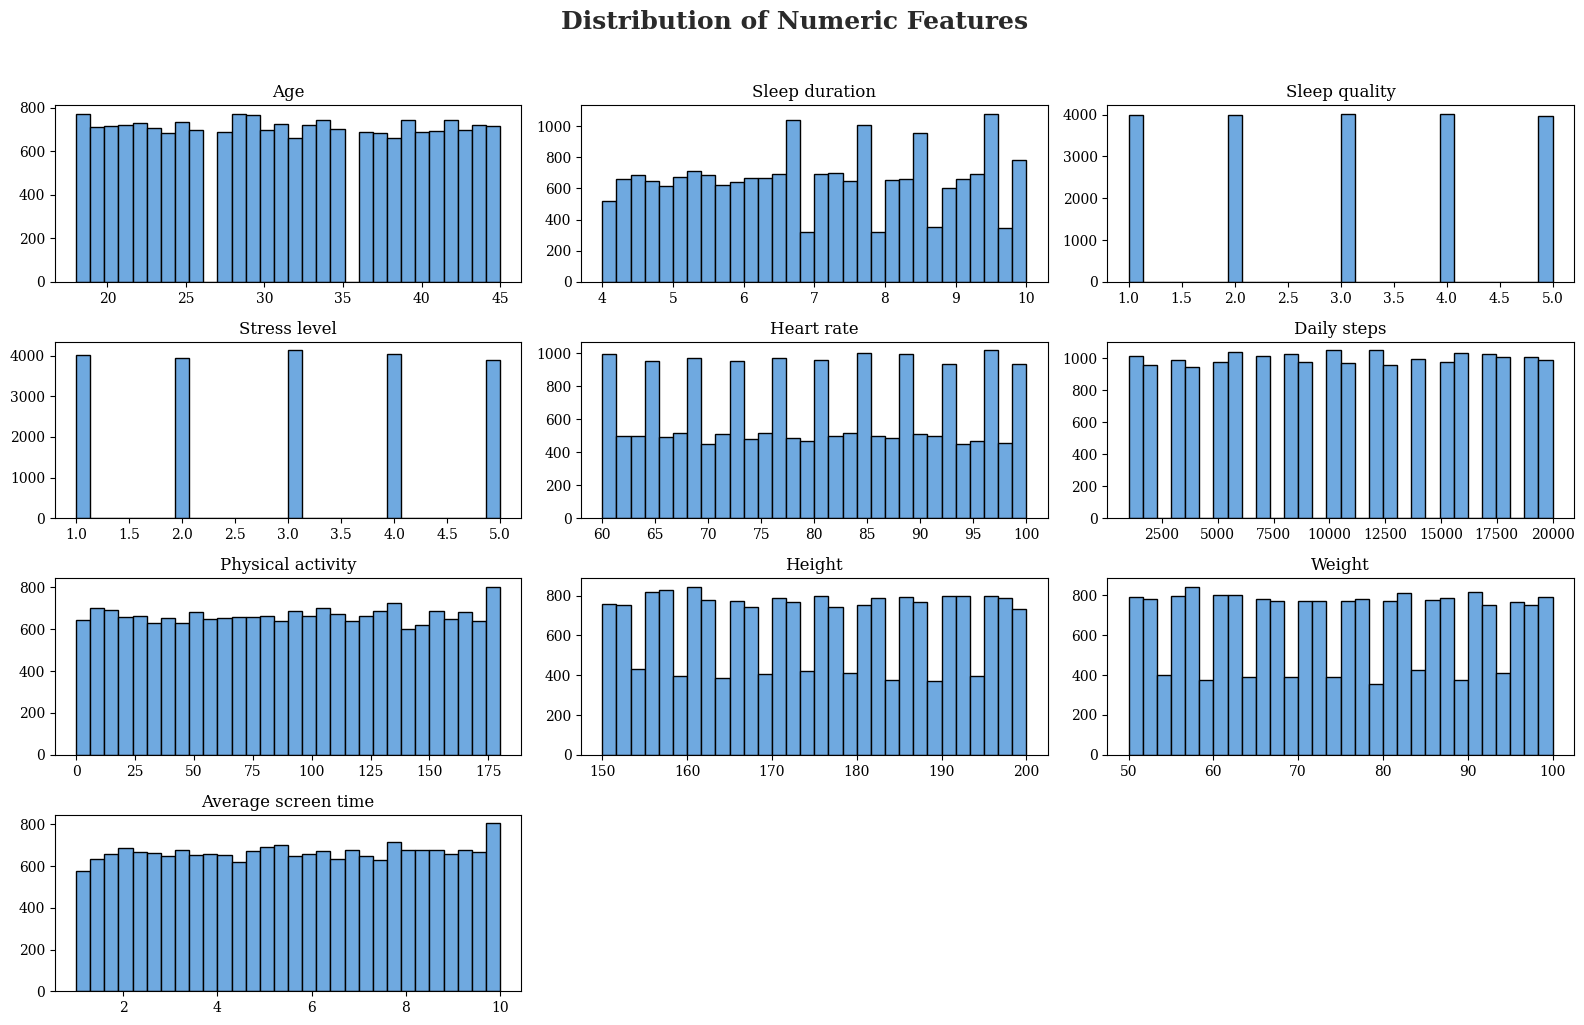

In [12]:
# Exploring Feature Relationships and Distribution:

# Set custom font properties globally
plt.rcParams['font.family'] = 'serif'

# Plot histograms
DED_data.hist(figsize=(16, 10), bins=30, color='#6FA9E0', edgecolor='black',grid=False)

# Add a main title
plt.suptitle('Distribution of Numeric Features', fontsize=18, color='#2a2a2a', fontweight='bold', y=1.02)

# Display the plot
plt.tight_layout()
plt.show()


In [13]:
# IQR Method for Outlier Detection

# Select numerical features
numeric_cols = DED_data.select_dtypes(include=['int64', 'float64']).columns

# IQR Method
outliers_iqr = {}
for col in numeric_cols:
    Q1 = DED_data[col].quantile(0.25)
    Q3 = DED_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = DED_data[(DED_data[col] < lower) | (DED_data[col] > upper)]
    outliers_iqr[col] = outliers.shape[0]

# Print the results
print("\nIQR Outliers (count per feature):")
print(pd.Series(outliers_iqr))



IQR Outliers (count per feature):
Age                    0
Sleep duration         0
Sleep quality          0
Stress level           0
Heart rate             0
Daily steps            0
Physical activity      0
Height                 0
Weight                 0
Average screen time    0
dtype: int64


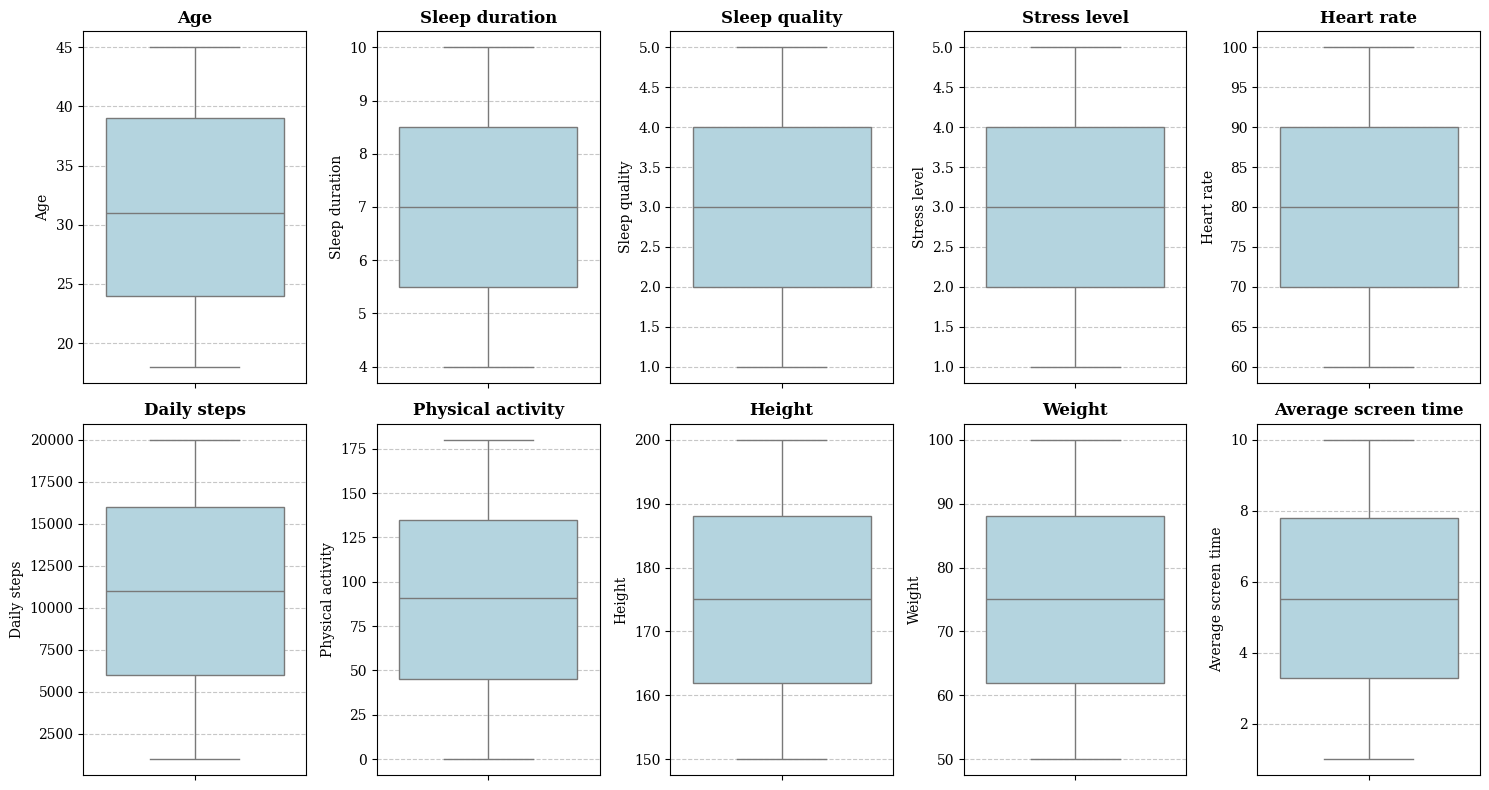

In [14]:
# Boxplots to visualize potential outliers in numerical features

# Select numerical features
numeric_cols = ['Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Heart rate',
                'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time']

# Set up the figure layout
num_features = len(numeric_cols)
fig, axes = plt.subplots(nrows=2, ncols=(num_features // 2) + (num_features % 2), figsize=(15, 8))
axes = axes.flatten()

# Create IQR boxplots for each numerical feature
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=DED_data[col], ax=axes[i], color="lightblue")
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# **Preprocessing**

## **Data Cleaning**

In [15]:
'''
After reviewing the dataset, the following aspects were checked to ensure data quality:

Since There is :
    - NO missing/null values
    - NO duplicate rows
    - Format is standerd in all categorical columns (NO whitespaces, Standardize to Title Case)

Conclusion:
    - the dataset is already clean and well-structured, no additional data cleaning steps were required.
    - The focus was directed towards feature transformation and preparation for modeling.
'''
# Standardize formatting of categorical columns (strip whitespaces, unify casing if needed)
categorical_cols = DED_data.select_dtypes(include='object').columns

for col in categorical_cols:
    DED_data[col] = DED_data[col].str.strip()  # Remove leading/trailing spaces
    DED_data[col] = DED_data[col].str.title()  # Optional: Standardize to Title Case (e.g., 'yes' -> 'Yes')


# Final check
print("\nData cleaned successfully. Dataset shape:", DED_data.shape)


Data cleaned successfully. Dataset shape: (20000, 26)


## **Feature Engineering 🪓**

In [16]:
# Split Blood pressure into two numerical columns
DED_data[['Systolic_BP', 'Diastolic_BP']] = DED_data['Blood pressure'].str.split('/', expand=True).astype(int)

#Drop the original 'Blood pressure' column
DED_data.drop('Blood pressure', axis=1, inplace=True)

In [17]:
pd.set_option('display.max_columns', None)
DED_data.head() # Confirm new columns added

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic_BP,Diastolic_BP
0,F,24,9.5,2,1,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,Y,137,89
1,M,39,9.6,2,3,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,Y,108,64
2,F,45,5.4,1,5,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,N,134,81
3,F,45,5.4,4,5,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,N,110,90
4,F,42,5.7,3,2,72,4000,173,179,99,N,Y,N,N,N,N,Y,N,N,3.5,N,Y,Y,N,Y,99,67


In [18]:
# Move 'Dry Eye Disease' to the end of the dataframe
target_col = 'Dry Eye Disease'
columns = [col for col in DED_data.columns if col != target_col] + [target_col]
DED_data = DED_data[columns]

In [19]:
pd.set_option('display.max_columns', None)
DED_data.head() # Confirm new column order

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Systolic_BP,Diastolic_BP,Dry Eye Disease
0,F,24,9.5,2,1,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,137,89,Y
1,M,39,9.6,2,3,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,108,64,Y
2,F,45,5.4,1,5,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,134,81,N
3,F,45,5.4,4,5,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,110,90,N
4,F,42,5.7,3,2,72,4000,173,179,99,N,Y,N,N,N,N,Y,N,N,3.5,N,Y,Y,N,99,67,Y


## **Label Encoding 📝**

In [20]:
# Identify non-numeric columns
non_numeric_cols = DED_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert categorical columns to numerical using Label Encoding
for col in non_numeric_cols:
    DED_data[col] = DED_data[col].astype('category').cat.codes

Non-numeric columns: Index(['Gender', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain',
       'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')


In [21]:
#  Check Encoding Results
pd.set_option('display.max_columns', None)
DED_data.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Systolic_BP,Diastolic_BP,Dry Eye Disease
0,0,24,9.5,2,1,67,3000,31,161,69,1,0,0,0,0,0,1,1,0,8.7,0,1,1,0,137,89,1
1,1,39,9.6,2,3,60,12000,74,164,87,0,0,0,0,1,0,1,1,0,9.6,1,0,0,1,108,64,1
2,0,45,5.4,1,5,95,12000,93,179,94,1,1,0,1,1,0,0,0,1,4.0,0,1,0,0,134,81,0
3,0,45,5.4,4,5,78,19000,32,160,77,0,0,0,1,0,0,1,0,0,7.6,0,1,0,1,110,90,0
4,0,42,5.7,3,2,72,4000,173,179,99,0,1,0,0,0,0,1,0,0,3.5,0,1,1,0,99,67,1


## **Feature Scaling (Normalization)**

In [22]:
# MinMax

# Define the Numerical Features to Scale
numeric_features = [
    'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
    'Heart rate', 'Daily steps', 'Physical activity',
    'Height', 'Weight', 'Average screen time',
    'Systolic_BP', 'Diastolic_BP']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
DED_data[numeric_features] = pd.DataFrame(
    scaler.fit_transform(DED_data[numeric_features]),
    columns=numeric_features,
    index=DED_data.index)

# Display the first 5 rows after normalization
DED_data.head()


,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Systolic_BP,Diastolic_BP,Dry Eye Disease
0,0,0.222222,0.916667,0.25,0.00,0.175,0.105263,0.172222,0.22,0.38,1,0,0,0,0,0,1,1,0,0.855556,0,1,1,0,0.94,0.966667,1
1,1,0.777778,0.933333,0.25,0.50,0.000,0.578947,0.411111,0.28,0.74,0,0,0,0,1,0,1,1,0,0.955556,1,0,0,1,0.36,0.133333,1
2,0,1.000000,0.233333,0.00,1.00,0.875,0.578947,0.516667,0.58,0.88,1,1,0,1,1,0,0,0,1,0.333333,0,1,0,0,0.88,0.700000,0
3,0,1.000000,0.233333,0.75,1.00,0.450,0.947368,0.177778,0.20,0.54,0,0,0,1,0,0,1,0,0,0.733333,0,1,0,1,0.40,1.000000,0
4,0,0.888889,0.283333,0.50,0.25,0.300,0.157895,0.961111,0.58,0.98,0,1,0,0,0,0,1,0,0,0.277778,0,1,1,0,0.18,0.233333,1


## **Features Relationship**

In [23]:
# 1. Compute Correlation Matrix with the target

target_corr_matrix = DED_data.corr().abs()
print(target_corr_matrix["Dry Eye Disease"].sort_values(ascending=False))

Dry Eye Disease                1.000000
Discomfort Eye-strain          0.109866
Redness in eye                 0.103410
Itchiness/Irritation in eye    0.101300
Average screen time            0.022490
Gender                         0.016321
Smart device before bed        0.013320
Alcohol consumption            0.011258
Systolic_BP                    0.007289
Height                         0.006437
Daily steps                    0.005664
Stress level                   0.005481
Age                            0.005258
Smoking                        0.005126
Diastolic_BP                   0.005051
Blue-light filter              0.005023
Sleep quality                  0.004990
Feel sleepy during day         0.004730
Ongoing medication             0.004188
Physical activity              0.003289
Caffeine consumption           0.002831
Sleep disorder                 0.002619
Weight                         0.002450
Heart rate                     0.002083
Medical issue                  0.001080


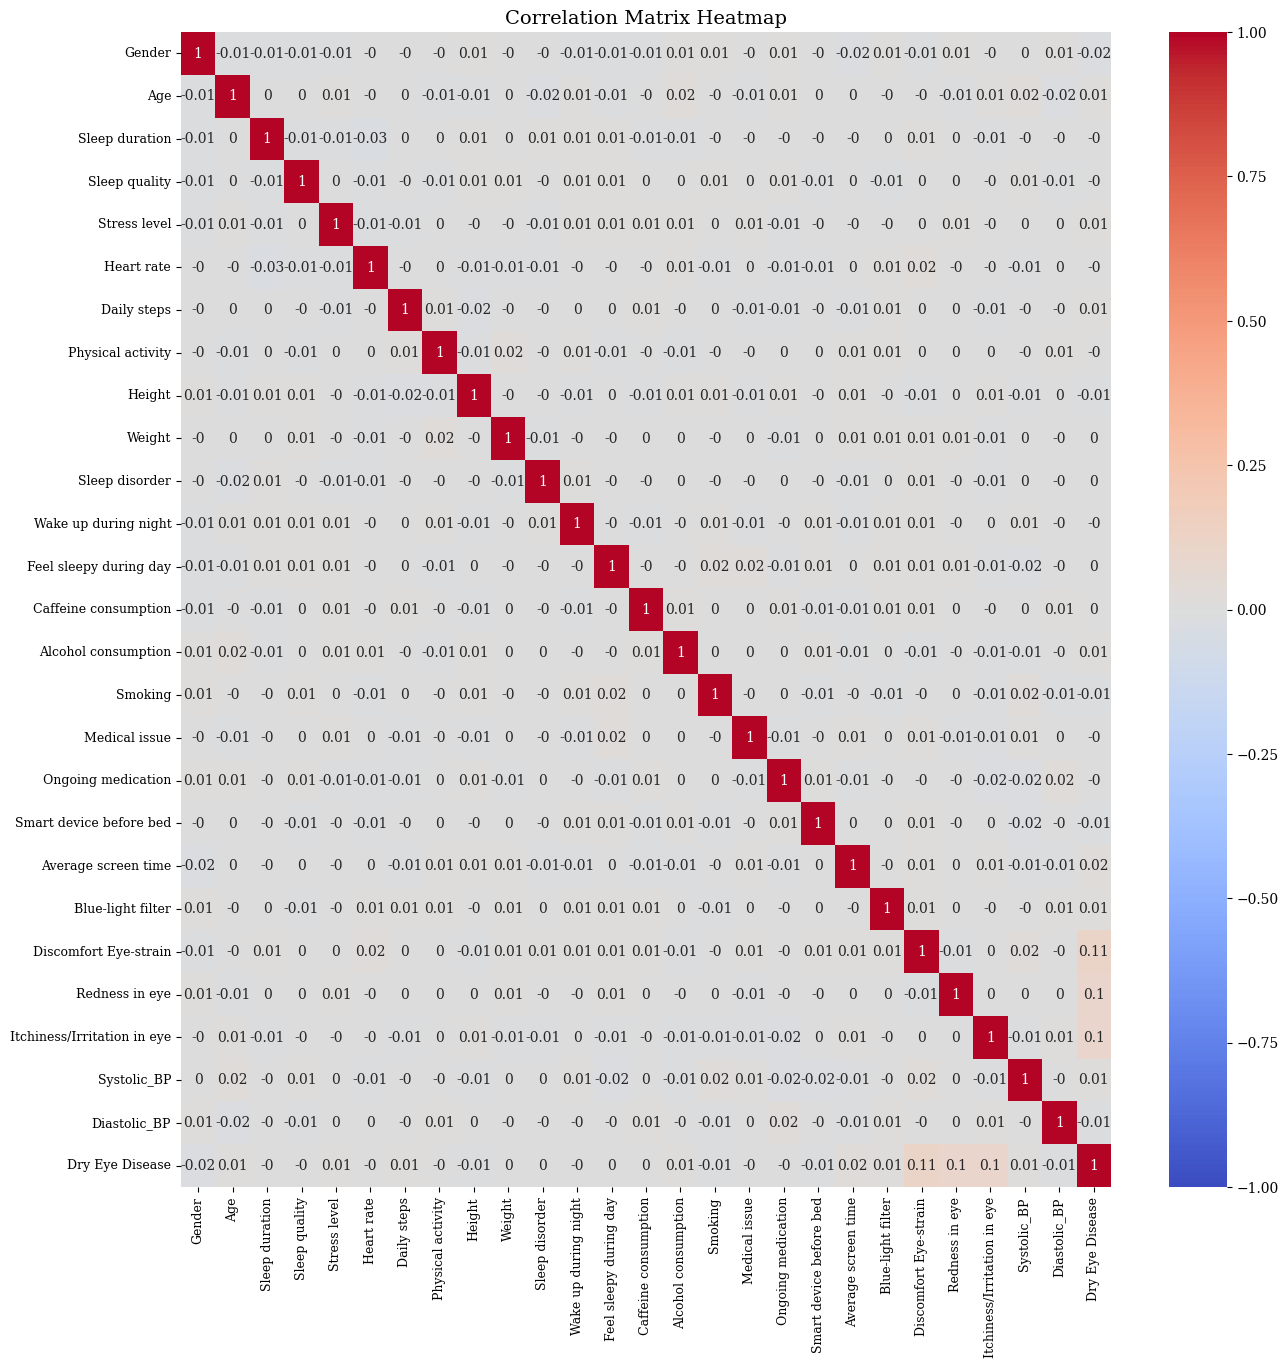

In [24]:
# 2. Plot Correlation Matrix

corr_matrix = DED_data.corr().round(2)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.xticks(fontsize=9, rotation=90)
plt.yticks(fontsize=9)
plt.show()

# **Unsupervised Implementation**

# **Clustering Models Cmparisons**

In [25]:
# 1. Sample the dataset (stratified)
sample_df, _ = train_test_split(
    DED_data,
    stratify=DED_data['Dry Eye Disease'],
    train_size=10000,
    random_state=42
)

In [26]:
# 2. Select features
features = [
    'Sleep duration', 'Sleep quality', 'Stress level',
    'Average screen time', 'Smart device before bed', 'Blue-light filter',
    'Physical activity', 'Daily steps',
    'Heart rate', 'Systolic_BP', 'Diastolic_BP'
]

X_cluster = sample_df[features]  # no target column

In [27]:
# 3. K-NN graph
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(X_cluster)
idx = nbrs.kneighbors(X_cluster)[1]
n = X_cluster.shape[0]
W = np.zeros((n, n))
for i, neigh in enumerate(idx):
    W[i, neigh] = 1
    W[neigh, i] = 1

# 4. Laplacian
D = np.diag(W.sum(axis=1))
L = D - W

# 5. Score each feature
scores = {}
for col in X_cluster.columns:
    f = X_cluster[col].values
    num = f.T @ D @ f
    den = f.T @ D @ f + 1e-12
    scores[col] = num / den

ranked = sorted(scores.items(), key=lambda x: x[1])
# Select top 6 features
top_features = [f for f, _ in ranked[:6]]
print("Top features:", top_features)
X_cluster = X_cluster[top_features]

Top features: ['Sleep duration', 'Sleep quality', 'Stress level', 'Average screen time', 'Smart device before bed', 'Blue-light filter']



KL Divergence between real and random data = 3.2400
Moderate clustering tendency: Clusters might exist.

 ---------------------------------------------------- 



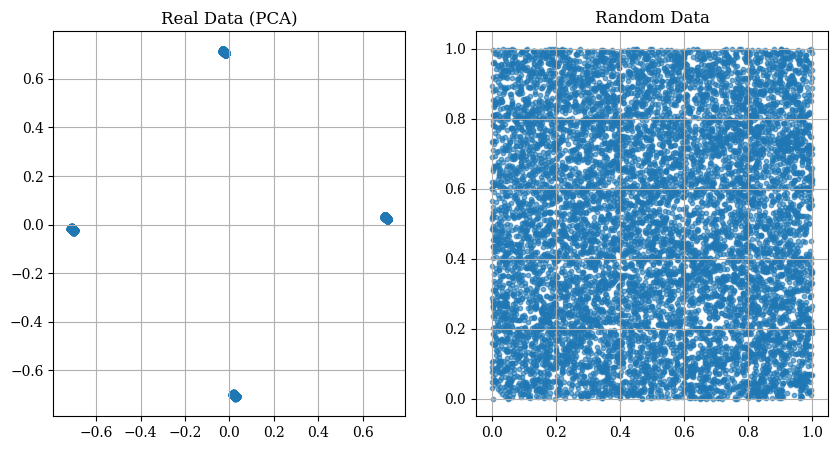

In [94]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Define EPMF computation
def compute_epmf(data, bins=10):
    hist, _ = np.histogramdd(data, bins=bins)
    hist = hist.flatten()
    hist += 1e-10  # avoid log(0)
    hist /= hist.sum()
    return hist

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca_cluster = pca.fit_transform(X_cluster.values)

# Create random data for comparison
random_data = np.random.rand(*X_pca_cluster.shape)

# Compute histograms
P = compute_epmf(X_pca_cluster, bins=10)
Q = compute_epmf(random_data, bins=10)

# KL Divergence
kl_divergence = entropy(P, Q)
print(f"\nKL Divergence between real and random data = {kl_divergence:.4f}")

# Interpretation
if kl_divergence < 0.1:
    print("Very low clustering tendency: Data is almost random.")
elif kl_divergence < 1:
    print("Weak clustering tendency: Clusters may not be very clear.")
elif kl_divergence < 5:
    print("Moderate clustering tendency: Clusters might exist.")
else:
    print("Strong clustering tendency: Likely good clustering structure.")


print("\n ---------------------------------------------------- \n")
# Plot real vs random PCA projections
plt.figure(figsize=(10, 5))

# Real data plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca_cluster[:, 0], X_pca_cluster[:, 1], s=10, alpha=0.6)
plt.title("Real Data (PCA)")
plt.grid(True)

# Random data plot
plt.subplot(1, 2, 2)
plt.scatter(random_data[:, 0], random_data[:, 1], s=10, alpha=0.6)
plt.title("Random Data")
plt.grid(True)

plt.show()


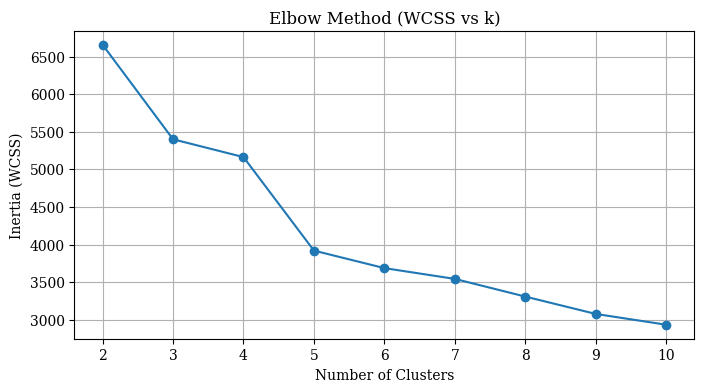


 --------------------------------------------------------------------- 



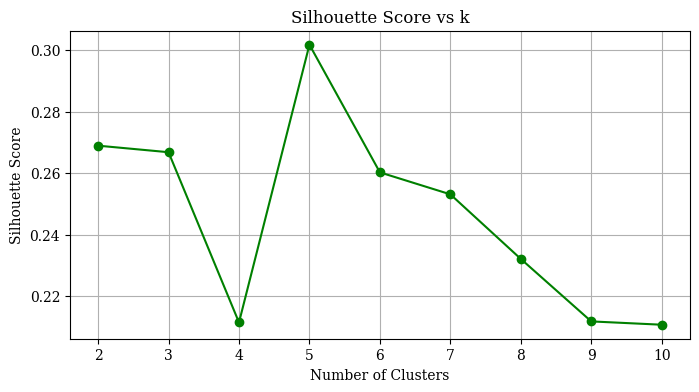

In [29]:
# 3. Elbow Method for KMeans
inertia_scores = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia_scores, marker='o')
plt.title('Elbow Method (WCSS vs k)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()
print("\n --------------------------------------------------------------------- \n")
# Plot Silhouette
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [30]:
eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_cluster)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")


eps=0.5, min_samples=3, clusters=4
eps=0.5, min_samples=5, clusters=4
eps=0.5, min_samples=10, clusters=4
eps=1, min_samples=3, clusters=1
eps=1, min_samples=5, clusters=1
eps=1, min_samples=10, clusters=1
eps=1.5, min_samples=3, clusters=1
eps=1.5, min_samples=5, clusters=1
eps=1.5, min_samples=10, clusters=1
eps=2, min_samples=3, clusters=1
eps=2, min_samples=5, clusters=1
eps=2, min_samples=10, clusters=1


In [31]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

# 1. Compute linkage
Z = linkage(X_cluster, method='ward')

# 2. Extract all merge heights and sort them
all_heights = Z[:, 2]
mh = np.sort(all_heights)

# 3. Find the largest gap
gaps = np.diff(mh)
idx = np.argmax(gaps)  # index where the gap is largest
lower, upper = mh[idx], mh[idx + 1]
cut_height = (lower + upper) / 2  # midpoint in that biggest gap

print(f"Biggest gap is between {lower:.3f} and {upper:.3f},")
print(f"so cutting at height = {cut_height:.3f} yields natural clusters.")

# 5. Check how many clusters you got
import pandas as pd
labels = fcluster(Z, t=cut_height, criterion='distance')
print(f"Clusters found: {pd.Series(labels).nunique()}")


Biggest gap is between 21.297 and 49.871,
so cutting at height = 35.584 yields natural clusters.
Clusters found: 4


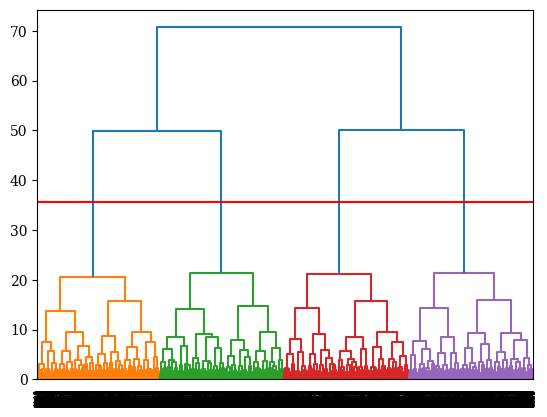

In [32]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dend = sch.dendrogram(sch.linkage(X_cluster, method='ward'))
plt.axhline(y=cut_height, color='r')  # cut-height
plt.show()


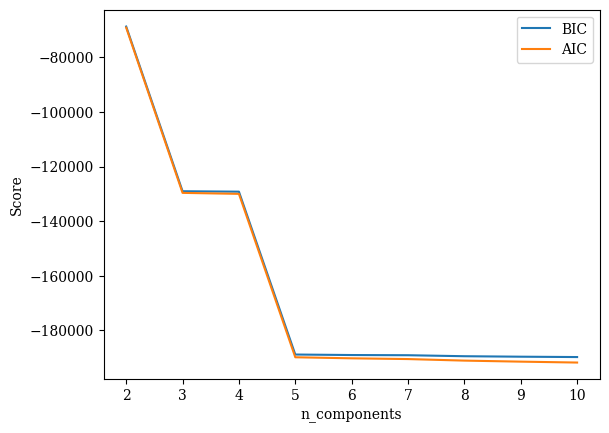

In [33]:
# Gaussian Mixture BIC/AIC plot
from sklearn.mixture import GaussianMixture
import numpy as np

n_components = range(2, 11)
bics = []
aics = []

for k in n_components:
    gm = GaussianMixture(n_components=k, random_state=42).fit(X_cluster)
    bics.append(gm.bic(X_cluster))
    aics.append(gm.aic(X_cluster))

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('n_components'); plt.ylabel('Score'); plt.legend(); plt.show()



Internal Clustering Metrics:


,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
KMeans,5.0,0.301833,3339.556198,1.465983
DBSCAN,4.0,0.354451,4009.591555,1.253968
Agglomerative,4.0,0.354451,4009.591555,1.253968
GMM,5.0,0.301673,3337.900051,1.467650



--------------------------------------------------------------------------------



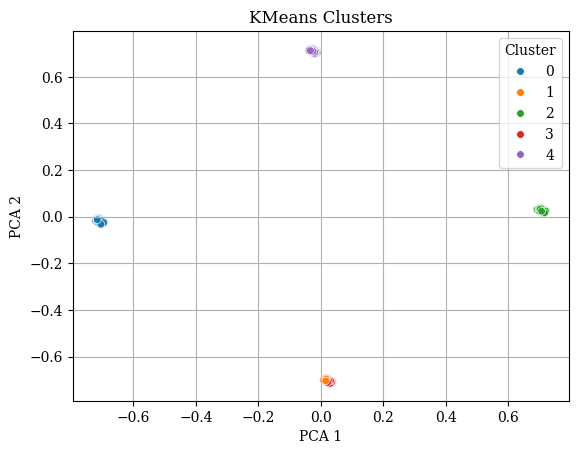


 --------------------------------------------------------------------



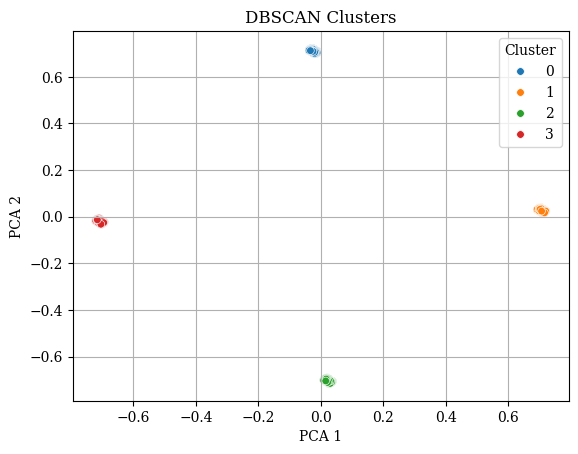


 --------------------------------------------------------------------



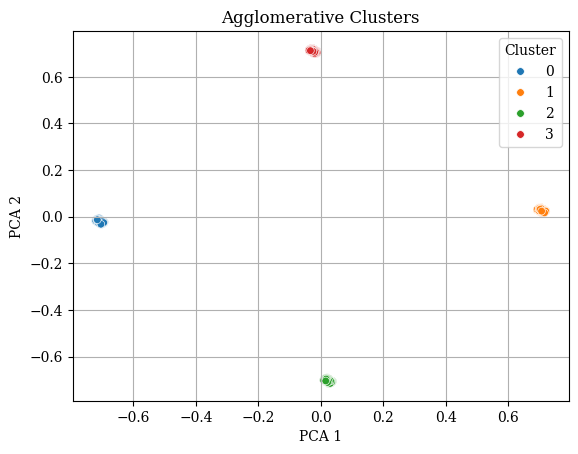


 --------------------------------------------------------------------



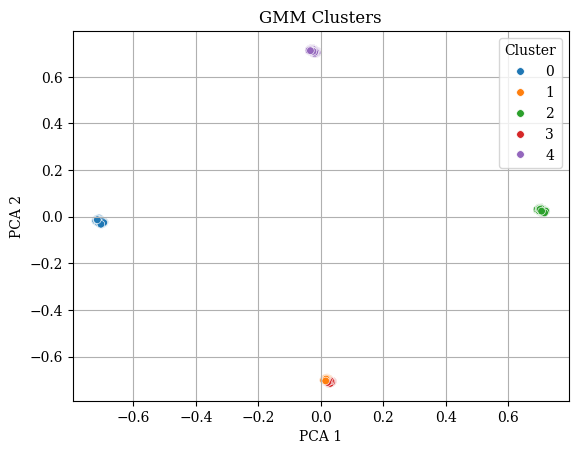


 --------------------------------------------------------------------



In [95]:
# Apply final clustering models
results = {}

def evaluate_clustering(name, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        results[name] = {
            'Clusters': n_clusters,
            'Silhouette': silhouette_score(X_cluster, labels),
            'Calinski-Harabasz': calinski_harabasz_score(X_cluster, labels),
            'Davies-Bouldin': davies_bouldin_score(X_cluster, labels)
        }
    else:
        results[name] = {
            'Clusters': n_clusters,
            'Silhouette': 'N/A',
            'Calinski-Harabasz': 'N/A',
            'Davies-Bouldin': 'N/A'
        }

# Best k based on elbow/silhouette
best_k = 5

# KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)
evaluate_clustering("KMeans", kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)
evaluate_clustering("DBSCAN", dbscan_labels)

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_cluster)
evaluate_clustering("Agglomerative", agglo_labels)

# GMM
gm = GaussianMixture(n_components=5, random_state=42)
gm.fit(X_cluster)
gmm_labels = gm.predict(X_cluster)
evaluate_clustering("GMM", gmm_labels)

# Separate into internal
internal_results = {k: v for k, v in results.items() if not k.endswith('_External')}

internal_df = pd.DataFrame(internal_results).T

print("\nInternal Clustering Metrics:")
display(internal_df)
print("\n" + "-"*80 + "\n")


# Visualize with PCA
def plot_pca_clusters(data, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=30)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.legend(title="Cluster")
    plt.show()
    print("\n --------------------------------------------------------------------\n")

plot_pca_clusters(X_cluster, kmeans_labels, "KMeans Clusters")
plot_pca_clusters(X_cluster, dbscan_labels, "DBSCAN Clusters")
plot_pca_clusters(X_cluster, agglo_labels, "Agglomerative Clusters")
plot_pca_clusters(X_cluster, gmm_labels, "GMM Clusters")


In [37]:
sample_df['DBSCAN_Cluster'] = dbscan_labels


In [39]:
# Move 'Dry Eye Disease' to the end of the dataframe
target_col = 'Dry Eye Disease'
columns = [col for col in sample_df.columns if col != target_col] + [target_col]
sample_df = sample_df[columns]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

display(sample_df)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Systolic_BP,Diastolic_BP,DBSCAN_Cluster,Dry Eye Disease
226,0,1.000000,0.633333,0.25,1.00,1.000,0.421053,0.155556,0.40,0.86,0,0,0,1,1,0,1,1,0,0.566667,1,0,0,0,0.40,0.466667,0,0
15551,0,0.703704,0.783333,0.75,1.00,0.225,1.000000,0.838889,0.94,0.66,1,1,1,1,1,1,1,0,1,0.588889,1,0,0,0,0.66,0.433333,1,0
9303,1,0.851852,0.050000,1.00,0.25,0.725,0.789474,0.094444,0.14,0.06,1,0,1,1,0,1,1,0,0,0.100000,1,1,1,1,0.80,0.466667,0,0
14101,1,0.888889,0.033333,0.75,0.00,0.025,0.736842,0.911111,0.80,0.12,0,0,0,0,1,1,1,0,1,0.277778,1,0,0,1,0.84,0.066667,1,1
14835,1,0.592593,0.566667,1.00,0.75,0.800,0.263158,0.722222,0.18,0.14,1,1,0,1,0,0,0,1,1,0.077778,0,1,0,1,0.62,0.800000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,1,0.703704,0.200000,0.75,0.00,0.625,0.947368,0.088889,0.48,0.70,1,1,0,1,0,0,0,1,0,0.055556,1,1,1,1,0.56,0.033333,0,1
16346,0,1.000000,0.083333,0.25,0.00,0.075,0.421053,0.411111,0.20,0.02,0,1,0,0,1,1,0,0,1,0.344444,0,0,1,0,0.96,0.033333,2,1
11043,0,0.444444,0.450000,0.75,0.50,0.750,0.315789,0.155556,1.00,0.68,0,0,0,1,1,0,0,1,1,0.144444,1,0,1,0,0.72,0.166667,1,1
15238,1,0.814815,0.200000,0.75,0.25,0.075,0.157895,0.005556,0.98,0.70,0,1,0,1,0,1,0,1,1,0.966667,0,1,0,1,0.78,0.700000,2,0


In [87]:
# Group by cluster and get mean lifestyle behaviors
cluster_profiles = sample_df.groupby('DBSCAN_Cluster')[top_features].mean()
display(cluster_profiles)

,Sleep duration,Sleep quality,Stress level,Average screen time,Smart device before bed,Blue-light filter
DBSCAN_Cluster,,,,,,
0,0.504357,0.507588,0.507689,0.504303,0.0,1.0
1,0.503320,0.498902,0.492216,0.500257,1.0,1.0
2,0.496631,0.496829,0.506441,0.507610,1.0,0.0
3,0.496821,0.510896,0.487805,0.499671,0.0,0.0


**Using API key from OpenIA to generate recommendation for each cluster**

In [ ]:
# Initialize OpenAI client
client = OpenAI(api_key="your key ")

In [92]:
def generate_recommendation(cluster_id, features):
    # Build feature summary dynamically
    feature_summary = "\n".join(
        [f"- {key}: {value:.2f}" for key, value in features.items()]
    )

    prompt = f"""
    You are a health and wellness assistant.

    Here is the average lifestyle behavior profile for Cluster {cluster_id}:

    {feature_summary}

    Based on this profile, write a clear and concise health and wellness lifestyle recommendation. Be constructive, supportive, and encouraging.
    """

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=200
    )

    return response.choices[0].message.content.strip()




In [96]:
for cluster_id, features in cluster_profiles.iterrows():
    recommendation = generate_recommendation(cluster_id, features)
    print(f"\n Recommendation for Cluster {cluster_id}:\n{recommendation}\n")



 Recommendation for Cluster 0:
Dear Cluster 0,

Based on your lifestyle behavior profile, it's great to see that you're already using a blue-light filter. This is a fantastic step towards protecting your eyes and promoting better sleep. 

However, there are a few areas that could further enhance your overall health and wellness. Your sleep duration and quality, along with your stress level, are all close to the midpoint. This suggests there might be room for improvement. 

1. Sleep: Aim to gradually increase your sleep duration. The optimal amount varies by individual, but typically ranges from 7 to 9 hours per night. This can help improve your overall sleep quality and energy levels.

2. Stress Management: Consider incorporating stress management techniques into your daily routine. This could be as simple as taking a few minutes each day for deep breathing exercises, mindfulness, or yoga. Regular physical activity can also help reduce stress.

3. Screen Time: Although your average sc

# **Supervised Implementation**

# **Logistic Regression**

In [59]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import machine learning tools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve,
    ConfusionMatrixDisplay, confusion_matrix, auc
)
# SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

In [60]:
# Separate features and target
X = sample_df.drop(columns=['Dry Eye Disease'])  # Inputs
y = sample_df['Dry Eye Disease']                # Target

In [61]:
# First split: 80% train, 20% temp
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Split temp into 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [62]:
# Apply SMOTE to balance the classes in training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_full, y_train_full)

**Evaluate default Logistic Regression BEFORE hyperparameter tuning**

In [63]:
# Evaluate default Logistic Regression BEFORE hyperparameter tuning

# Train default model on SMOTE-balanced training data
default_model = LogisticRegression(max_iter=1000)
default_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred_val_before = default_model.predict(X_val)
y_val_proba_before = default_model.predict_proba(X_val)[:, 1]

# Compute metrics on validation set before tuning
val_acc_before = accuracy_score(y_val, y_pred_val_before)
val_prec_before = precision_score(y_val, y_pred_val_before)
val_rec_before = recall_score(y_val, y_pred_val_before)
val_f1_before = f1_score(y_val, y_pred_val_before)
val_auc_before = roc_auc_score(y_val, y_val_proba_before)

# Print results
print("Validation Metrics BEFORE Hyperparameter Tuning:")
print(f"Accuracy:  {val_acc_before:.2%}")
print(f"Precision: {val_prec_before:.2%}")
print(f"Recall:    {val_rec_before:.2%}")
print(f"F1 Score:  {val_f1_before:.2%}")
print(f"AUC-ROC:   {val_auc_before:.2%}")

Validation Metrics BEFORE Hyperparameter Tuning:
Accuracy:  60.40%
Precision: 73.19%
Recall:    61.96%
F1 Score:  67.11%
AUC-ROC:   63.36%


**Evaluate default Logistic Regression AFTER hyperparameter tuning**

In [64]:
# Define hyperparameter search space for Logistic Regression
param_grid = {
    'C': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],     # Solvers for optimization
    'penalty': ['l2']                    # Regularization type
}

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search on the SMOTE-balanced training set
grid_search.fit(X_train_smote, y_train_smote)

# Print best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
Best Parameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [65]:
# Initialize best model using tuned hyperparameters
best_model = LogisticRegression(
    max_iter=1000,
    C=best_params['C'],
    solver=best_params['solver'],
    penalty=best_params['penalty']
)

# Train the final model on SMOTE-balanced training data
best_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.0001, max_iter=1000, solver='liblinear')

In [66]:
# Predict on validation set
y_pred_val = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Compute validation metrics
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy: ", f"{val_accuracy:.2%}")
print("Validation Precision:", f"{val_precision:.2%}")
print("Validation Recall:   ", f"{val_recall:.2%}")
print("Validation F1 Score: ", f"{val_f1:.2%}")
print("Validation AUC-ROC:  ", f"{val_auc:.2%}")

Validation Accuracy:  68.10%
Validation Precision: 71.16%
Validation Recall:    85.89%
Validation F1 Score:  77.83%
Validation AUC-ROC:   63.77%


In [67]:
 # Combine training + validation sets
import numpy as np
X_trainval = np.vstack([X_train_full, X_val])
y_trainval = np.hstack([y_train_full, y_val])

# Apply SMOTE to the combined set
smote = SMOTE(random_state=42)
X_trainval_smote, y_trainval_smote = smote.fit_resample(X_trainval, y_trainval)

# Retrain the best model on the full (balanced) training + validation data
final_model = LogisticRegression(
    max_iter=1000,
    C=best_params['C'],
    solver=best_params['solver'],
    penalty=best_params['penalty']
)

# Fit the model
final_model.fit(X_trainval_smote, y_trainval_smote)
y_trainval_pred = final_model.predict(X_trainval_smote)
y_trainval_proba = final_model.predict_proba(X_trainval_smote)[:, 1]

# Compute metrics
trainval_accuracy = accuracy_score(y_trainval_smote, y_trainval_pred)
trainval_precision = precision_score(y_trainval_smote, y_trainval_pred)
trainval_recall = recall_score(y_trainval_smote, y_trainval_pred)
trainval_f1 = f1_score(y_trainval_smote, y_trainval_pred)
trainval_auc = roc_auc_score(y_trainval_smote, y_trainval_proba)

# Print results
print(f"Combined Train+Val Accuracy:    {trainval_accuracy:.2%}")
print(f"Combined Train+Val Precision:   {trainval_precision:.2%}")
print(f"Combined Train+Val Recall:      {trainval_recall:.2%}")
print(f"Combined Train+Val F1 Score:    {trainval_f1:.2%}")
print(f"Combined Train+Val AUC-ROC:     {trainval_auc:.2%}")

# Optional: detailed report
print("\nClassification Report:\n", classification_report(y_trainval_smote, y_trainval_pred))

Combined Train+Val Accuracy:    58.47%
Combined Train+Val Precision:   57.02%
Combined Train+Val Recall:      68.79%
Combined Train+Val F1 Score:    62.36%
Combined Train+Val AUC-ROC:     62.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54      5867
           1       0.57      0.69      0.62      5867

    accuracy                           0.58     11734
   macro avg       0.59      0.58      0.58     11734
weighted avg       0.59      0.58      0.58     11734



In [68]:
# Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy:  {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall:    {recall:.2%}")
print(f"F1 Score:  {f1:.2%}")
print(f"AUC-ROC:   {roc_auc:.2%}")


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.28      0.36       348
           1       0.69      0.85      0.76       652

    accuracy                           0.65      1000
   macro avg       0.59      0.56      0.56      1000
weighted avg       0.62      0.65      0.62      1000

Accuracy:  65.10%
Precision: 68.87%
Recall:    84.82%
F1 Score:  76.01%
AUC-ROC:   56.03%


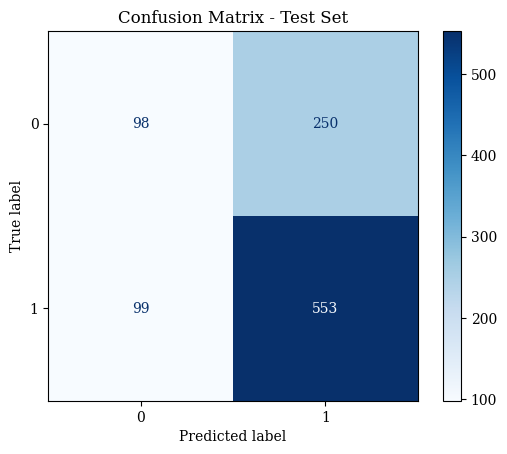


 ---------------------------------------- 



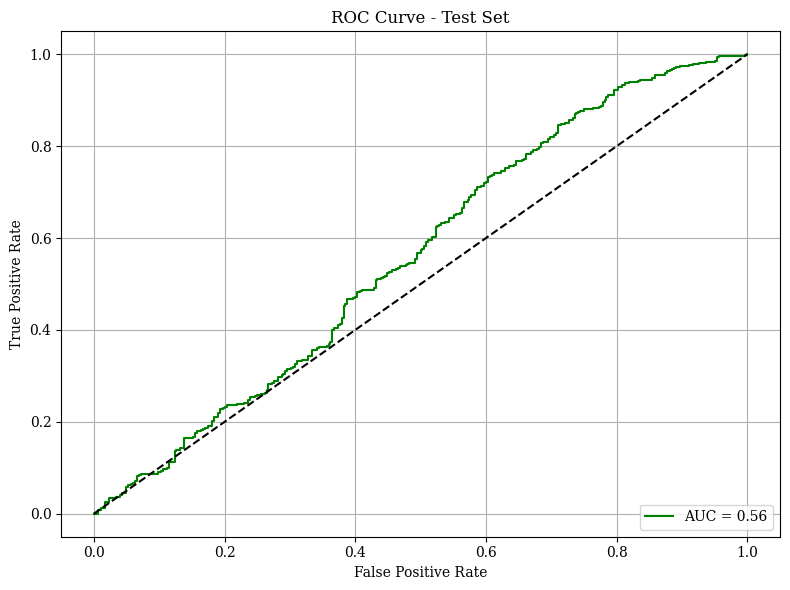

In [69]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()

print("\n ---------------------------------------- \n")
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# **XGBoosts**

In [70]:
# Split the dataset into features and target variable
X = sample_df.drop(columns=[target_col])
y = sample_df[target_col]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
Dry Eye Disease
1    5215
0    2785
Name: count, dtype: int64
Class distribution after SMOTE:
Dry Eye Disease
1    5215
0    5215
Name: count, dtype: int64


**without hyperparameter**


Initial Model Accuracy: 64.20%
Initial Model Precision: 61.83%
Initial Model Recall: 64.20%
Initial Model F1 Score: 62.21%


 --------------------------------------- 



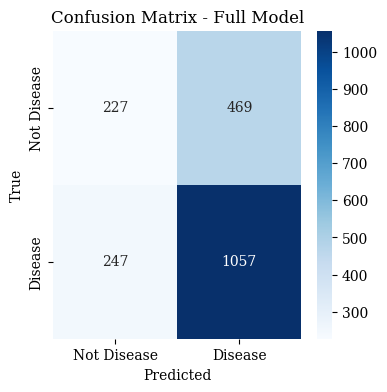

In [71]:
import xgboost as xgb
#  Train the initial XGBoost model
model_full = xgb.XGBClassifier(eval_metric='logloss')
model_full.fit(X_train_resampled, y_train_resampled)

#  Make predictions and evaluate the initial model
y_pred_full = model_full.predict(X_test)

#  Calculate metrics for the initial model
accuracy_full = accuracy_score(y_test, y_pred_full) * 100
precision_full = precision_score(y_test, y_pred_full, average='weighted') * 100
recall_full = recall_score(y_test, y_pred_full, average='weighted') * 100
f1_full = f1_score(y_test, y_pred_full, average='weighted') * 100

# Print metrics for the initial model
print(f"\nInitial Model Accuracy: {accuracy_full:.2f}%")
print(f"Initial Model Precision: {precision_full:.2f}%")
print(f"Initial Model Recall: {recall_full:.2f}%")
print(f"Initial Model F1 Score: {f1_full:.2f}%\n")

print("\n --------------------------------------- \n")
# Plot the confusion matrix
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Disease', 'Disease'],
            yticklabels=['Not Disease', 'Disease'])
plt.title('Confusion Matrix - Full Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#  Get predicted probabilities for ROC curve
y_scores_initial = model_full.predict_proba(X_test)[:, 1]

**with hyperparameter**

In [72]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],               # Number of boosting rounds
    'max_depth': [3, 5, 7],                       # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],            # Learning rate
    'subsample': [0.6, 0.8, 1.0],                 # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0],          # Subsample ratio of columns for each tree
    'gamma': [0, 0.1, 0.2],                       # Minimum loss reduction required to make a split
    'min_child_weight': [1, 3, 5],                # Minimum sum of instance weight (hessian) needed in a child
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model_full, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV on the reduced training set
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


Best Tuned Model Accuracy: 70.20%
Best Tuned Model Precision: 69.89%
Best Tuned Model Recall: 70.20%
Best Tuned Model F1 Score: 65.61%

 ------------------------------------------------------------------------------ 



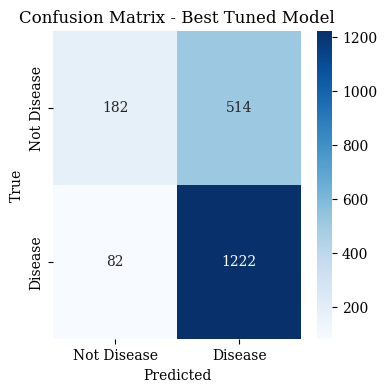

In [73]:
# Retrain the reduced model with the best parameters
best_model = xgb.XGBClassifier(**best_params, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

y_pred_best = best_model.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best, average='weighted') * 100
recall_best = recall_score(y_test, y_pred_best, average='weighted') * 100
f1_best = f1_score(y_test, y_pred_best, average='weighted') * 100

print(f"Best Tuned Model Accuracy: {accuracy_best:.2f}%")
print(f"Best Tuned Model Precision: {precision_best:.2f}%")
print(f"Best Tuned Model Recall: {recall_best:.2f}%")
print(f"Best Tuned Model F1 Score: {f1_best:.2f}%")

print('\n ------------------------------------------------------------------------------ \n')

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Disease', 'Disease'],
            yticklabels=['Not Disease', 'Disease'])
plt.title('Confusion Matrix - Best Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

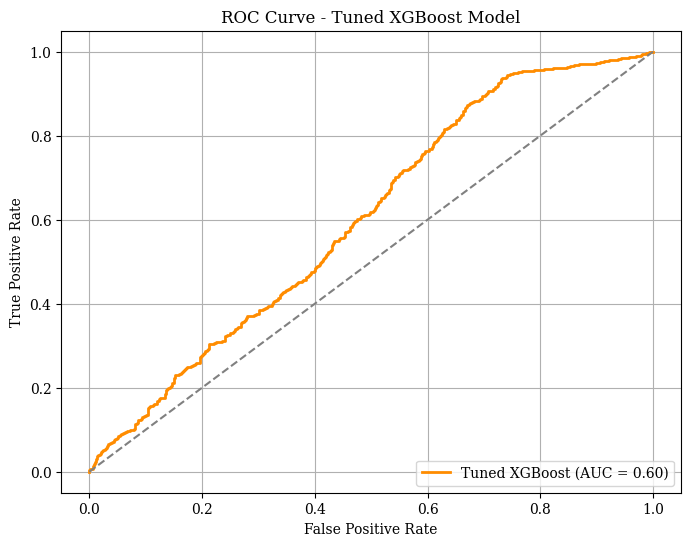

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_scores_best = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores_best)
auc_score = roc_auc_score(y_test, y_scores_best)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Tuned XGBoost (AUC = {auc_score:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **LightGBM**

In [75]:
# Drop target column 'Dry Eye Disease' from the features
X_Light = sample_df.drop(columns=['Dry Eye Disease'])  # Drop the target column
y_Light = sample_df['Dry Eye Disease']  # Define the target variable

In [76]:
# --- 2. Split the data into training and testing sets ---
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with a test size of 20%
X_train_light, X_test_light, y_train_light, y_test_light = train_test_split(X_Light, y_Light, test_size=0.2, random_state=42, stratify=y)

In [77]:
# --- 3. Apply SMOTE (Synthetic Minority Over-sampling Technique) to the training set only ---
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_smote_light, y_train_smote_light = smote.fit_resample(X_train_light, y_train_light)

In [78]:
# --- 4. Train LightGBM model with default hyperparameters ---
from lightgbm import LGBMClassifier

# Initialize the LightGBM model with default settings
def_model = LGBMClassifier(random_state=42)

# Fit the model to the SMOTE-resampled training data
def_model.fit(X_train_smote_light, y_train_smote_light)

# Predict the labels for the test data
y_pred_default_light = def_model.predict(X_test_light)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5215, number of negative: 5215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3088
[LightGBM] [Info] Number of data points in the train set: 10430, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [79]:
# --- 5. Evaluate the default model ---
from sklearn.metrics import classification_report, accuracy_score

# Print the evaluation metrics for the default model
print("Default Model Evaluation:")
print(classification_report(y_test_light, y_pred_default_light))
print("Accuracy:", accuracy_score(y_test_light, y_pred_default_light))

Default Model Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.29      0.39       696
           1       0.70      0.89      0.79      1304

    accuracy                           0.68      2000
   macro avg       0.65      0.59      0.59      2000
weighted avg       0.66      0.68      0.65      2000

Accuracy: 0.683


In [80]:
# --- 6. Hyperparameter tuning using GridSearchCV ---
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Trying different learning rates
    'n_estimators': [50, 100, 200],  # Trying different numbers of estimators (trees)
    'num_leaves': [20, 30, 40],  # Trying different number of leaves in the trees
    'max_depth': [-1, 10, 20]  # Trying different max depth for the trees
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train_smote_light, y_train_smote_light)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Get the best estimator (model) from the grid search
opt_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4172, number of negative: 4172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3082
[LightGBM] [Info] Number of data points in the train set: 8344, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4172, number of negative: 4172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

In [82]:
# --- 7. Predict and evaluate the tuned model ---
y_pred_opt = opt_model.predict(X_test_light)

# Evaluate the model with different metrics
from sklearn.metrics import f1_score, recall_score, roc_auc_score

print("\nTuned Model Evaluation:")
print(classification_report(y_test_light, y_pred_opt))
print("Accuracy:", accuracy_score(y_test_light, y_pred_opt))
print("F1 Score:", f1_score(y_test_light, y_pred_opt))
print("Recall:", recall_score(y_test_light, y_pred_opt))
print("AUC:", roc_auc_score(y_test_light, opt_model.predict_proba(X_test_light)[:, 1]))


Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.26      0.38       696
           1       0.70      0.93      0.80      1304

    accuracy                           0.70      2000
   macro avg       0.69      0.60      0.59      2000
weighted avg       0.70      0.70      0.66      2000

Accuracy: 0.7005
F1 Score: 0.8026359143327841
Recall: 0.9340490797546013
AUC: 0.5970863303011071


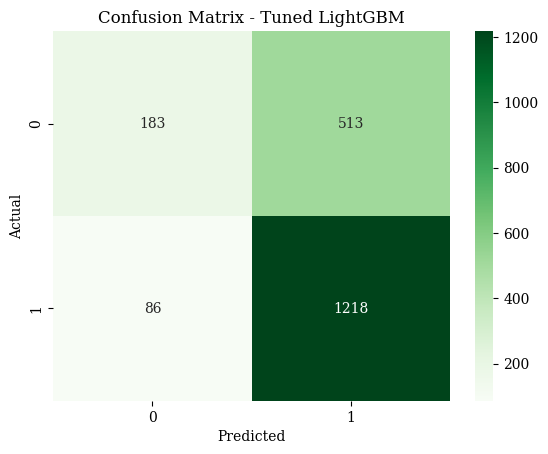

In [83]:
# --- 8. Plotting the Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for the tuned model
cm = confusion_matrix(y_test_light, y_pred_opt)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

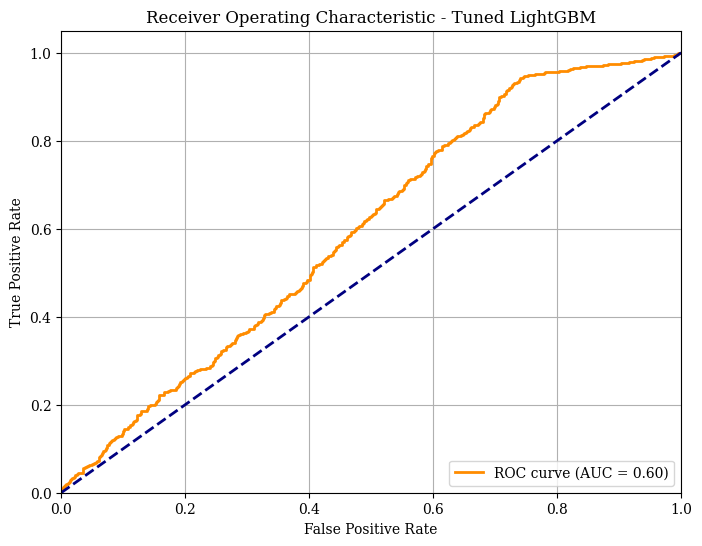

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_scores = opt_model.predict_proba(X_test_light)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_light, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Tuned LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()
